<a href="https://colab.research.google.com/github/Auryvilia/Komputer_Grafik/blob/main/Corner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


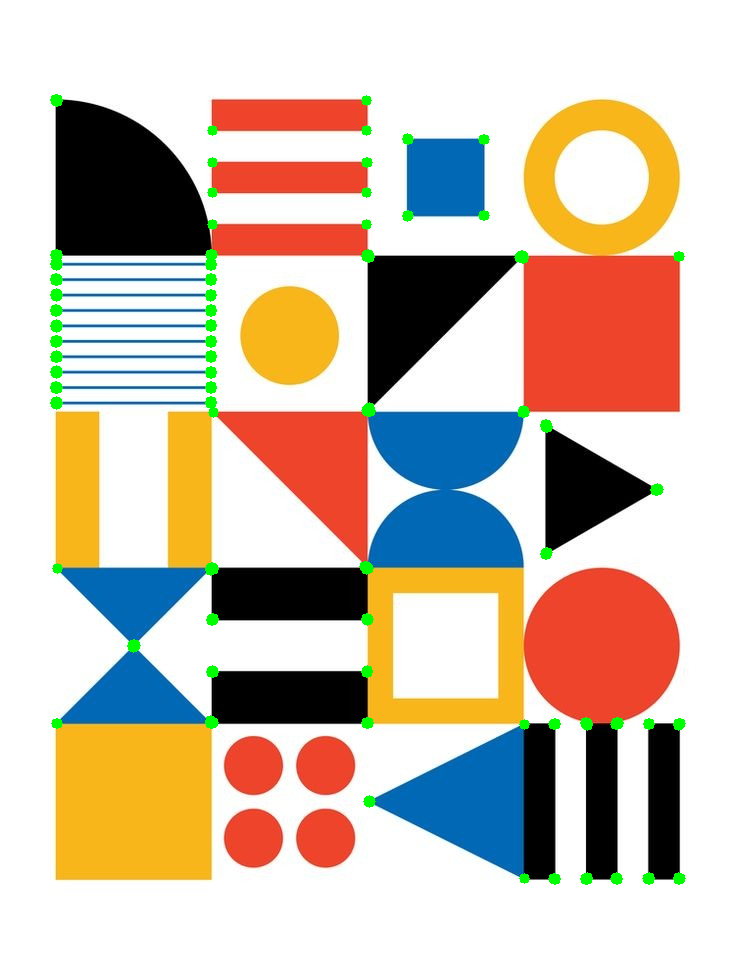

In [ ]:
#Harris Corner dengan Python


import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab.patches import cv2_imshow

# Mount Google Drive
drive.mount('/content/drive')

# Path ke gambar di Google Drive
image_path = '/content/drive/MyDrive/Kuliah/Semester 5/Komputer Grafik/geometri.jpg'

# Membaca gambar
image = cv2.imread(image_path)

# Mengubah gambar menjadi grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Menghitung gradien menggunakan Sobel
Ix = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)  # Gradien arah X
Iy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)  # Gradien arah Y

# Komponen matriks H
Ixx = Ix**2
Iyy = Iy**2
Ixy = Ix * Iy

# Parameter untuk Harris Corner
k = 0.04
window_size = 3

# Menggunakan Gaussian Blur untuk komponen matriks H
Sxx = cv2.GaussianBlur(Ixx, (window_size, window_size), 0)
Syy = cv2.GaussianBlur(Iyy, (window_size, window_size), 0)
Sxy = cv2.GaussianBlur(Ixy, (window_size, window_size), 0)

# Menghitung respons sudut Harris (R)
det = (Sxx * Syy) - (Sxy**2)
trace = Sxx + Syy
R = det - k * (trace**2)

# Thresholding untuk menemukan titik sudut
threshold = 0.05 * R.max()
corners = np.where(R > threshold)

# Menandai titik sudut pada gambar
for y, x in zip(corners[0], corners[1]):
    cv2.circle(image, (x, y), 5, (0, 255, 0), -1)

# Menampilkan gambar dengan titik sudut
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


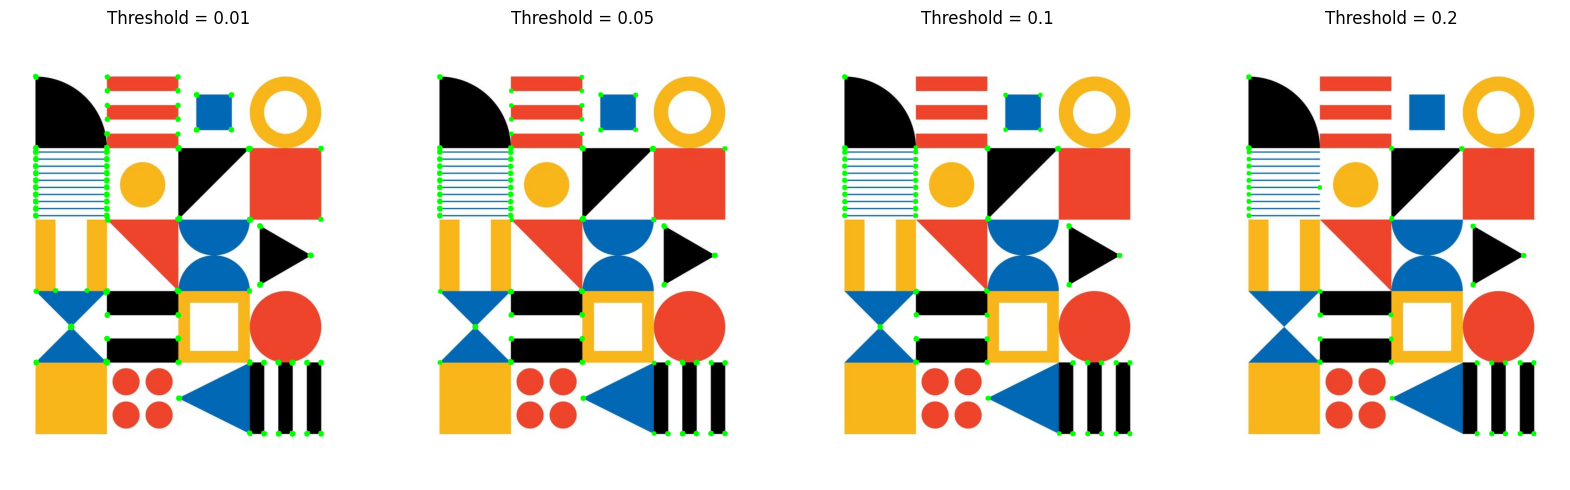

In [ ]:
#Menyesuaikan Nilai Threshold pada Harris Corner Detection

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab.patches import cv2_imshow

# Mount Google Drive
drive.mount('/content/drive')

# Path ke gambar di Google Drive
image_path = '/content/drive/MyDrive/Kuliah/Semester 5/Komputer Grafik/geometri.jpg'

# Membaca gambar
image = cv2.imread(image_path)

# Mengubah gambar menjadi grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Menghitung gradien menggunakan Sobel
Ix = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)  # Gradien arah X
Iy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)  # Gradien arah Y

# Komponen matriks H
Ixx = Ix**2
Iyy = Iy**2
Ixy = Ix * Iy

# Parameter untuk Harris Corner
k = 0.04
window_size = 3

# Menggunakan Gaussian Blur untuk komponen matriks H
Sxx = cv2.GaussianBlur(Ixx, (window_size, window_size), 0)
Syy = cv2.GaussianBlur(Iyy, (window_size, window_size), 0)
Sxy = cv2.GaussianBlur(Ixy, (window_size, window_size), 0)

# Menghitung respons sudut Harris (R)
det = (Sxx * Syy) - (Sxy**2)
trace = Sxx + Syy
R = det - k * (trace**2)

# Fungsi untuk menampilkan hasil deteksi sudut dengan threshold yang berbeda
def detect_and_show_corners(threshold_factor):
    # Thresholding untuk menemukan titik sudut
    threshold = threshold_factor * R.max()
    corners = np.where(R > threshold)

    # Menandai titik sudut pada gambar
    image_copy = image.copy()
    for y, x in zip(corners[0], corners[1]):
        cv2.circle(image_copy, (x, y), 5, (0, 255, 0), -1)

    # Mengembalikan gambar dengan titik sudut
    return image_copy

# Menampilkan gambar dengan berbagai nilai threshold
threshold_values = [0.01, 0.05, 0.1, 0.2]
fig, axes = plt.subplots(1, 4, figsize=(20, 10))
for ax, threshold_value in zip(axes, threshold_values):
    result_image = detect_and_show_corners(threshold_value)
    ax.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
    ax.set_title(f'Threshold = {threshold_value}')
    ax.axis('off')

plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


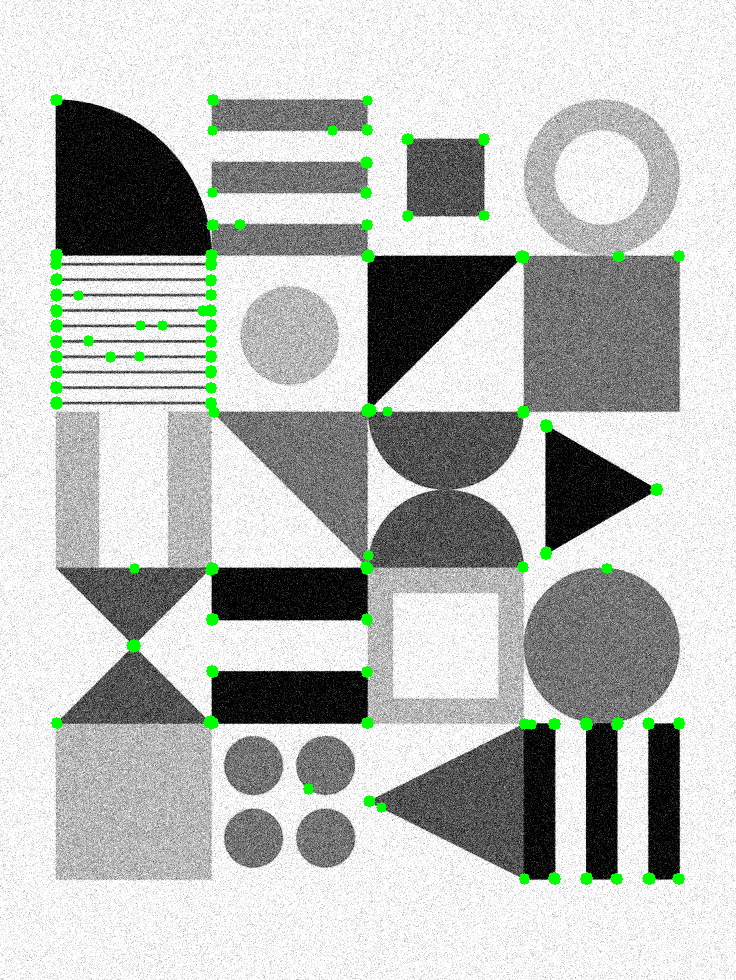

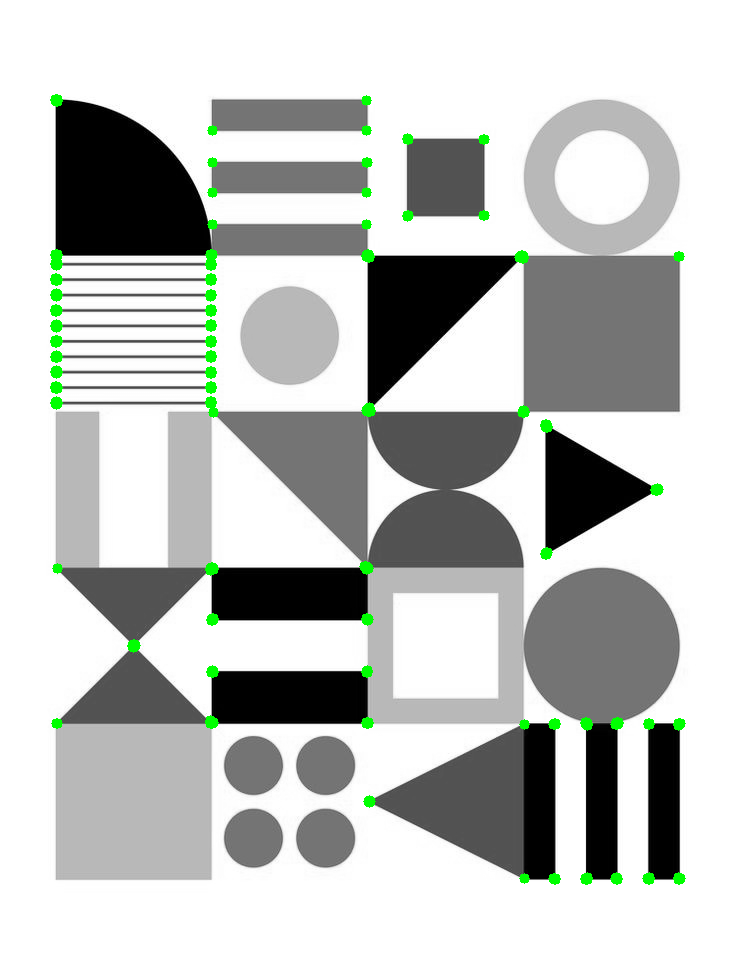

In [ ]:
#Menambahkan Noise Gaussian

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab.patches import cv2_imshow

# Mount Google Drive
drive.mount('/content/drive')

# Path ke gambar di Google Drive
image_path = '/content/drive/MyDrive/Kuliah/Semester 5/Komputer Grafik/geometri.jpg'

# Membaca gambar
image = cv2.imread(image_path)

# Mengubah gambar menjadi grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Menambahkan noise Gaussian pada gambar
def add_gaussian_noise(image, mean=0, sigma=25):
    """Fungsi untuk menambahkan noise Gaussian pada gambar"""
    noise = np.random.normal(mean, sigma, image.shape).astype('float32')
    noisy_image = cv2.add(image.astype('float32'), noise)
    return np.clip(noisy_image, 0, 255).astype('uint8')

# Menambahkan noise pada gambar
noisy_image = add_gaussian_noise(gray)

# Menghitung gradien menggunakan Sobel untuk gambar noisy
Ix_noisy = cv2.Sobel(noisy_image, cv2.CV_64F, 1, 0, ksize=3)  # Gradien arah X
Iy_noisy = cv2.Sobel(noisy_image, cv2.CV_64F, 0, 1, ksize=3)  # Gradien arah Y

# Komponen matriks H untuk gambar noisy
Ixx_noisy = Ix_noisy**2
Iyy_noisy = Iy_noisy**2
Ixy_noisy = Ix_noisy * Iy_noisy

# Parameter untuk Harris Corner
k = 0.04
window_size = 3

# Menggunakan Gaussian Blur untuk komponen matriks H
Sxx_noisy = cv2.GaussianBlur(Ixx_noisy, (window_size, window_size), 0)
Syy_noisy = cv2.GaussianBlur(Iyy_noisy, (window_size, window_size), 0)
Sxy_noisy = cv2.GaussianBlur(Ixy_noisy, (window_size, window_size), 0)

# Menghitung respons sudut Harris (R) untuk gambar noisy
det_noisy = (Sxx_noisy * Syy_noisy) - (Sxy_noisy**2)
trace_noisy = Sxx_noisy + Syy_noisy
R_noisy = det_noisy - k * (trace_noisy**2)

# Thresholding untuk menemukan titik sudut pada gambar noisy
threshold_noisy = 0.05 * R_noisy.max()
corners_noisy = np.where(R_noisy > threshold_noisy)


# Menandai titik sudut pada gambar noisy
image_noisy = cv2.cvtColor(noisy_image, cv2.COLOR_GRAY2BGR)
for y, x in zip(corners_noisy[0], corners_noisy[1]):
    cv2.circle(image_noisy, (x, y), 5, (0, 255, 0), -1)

# Menampilkan gambar dengan noise dan titik sudut yang terdeteksi
cv2_imshow(image_noisy)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Membandingkan dengan gambar asli tanpa noise
# Menghitung respons sudut Harris (R) untuk gambar asli
Ix = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
Iy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

Ixx = Ix**2
Iyy = Iy**2
Ixy = Ix * Iy

Sxx = cv2.GaussianBlur(Ixx, (window_size, window_size), 0)
Syy = cv2.GaussianBlur(Iyy, (window_size, window_size), 0)
Sxy = cv2.GaussianBlur(Ixy, (window_size, window_size), 0)

det = (Sxx * Syy) - (Sxy**2)
trace = Sxx + Syy
R = det - k * (trace**2)

threshold = 0.05 * R.max()
corners = np.where(R > threshold)

# Menandai titik sudut pada gambar asli
image_copy = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
for y, x in zip(corners[0], corners[1]):
    cv2.circle(image_copy, (x, y), 5, (0, 255, 0), -1)

# Menampilkan gambar asli dengan titik sudut yang terdeteksi
cv2_imshow(image_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
# Deteksi sudut pada berbagai jenis gambar

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab.patches import cv2_imshow

# Mount Google Drive
drive.mount('/content/drive')

# Path ke gambar di Google Drive
geometric_image_path = '/content/drive/MyDrive/Kuliah/Semester 5/Komputer Grafik/geometri.jpg'
geometric2_image_path = '/content/drive/MyDrive/Kuliah/Semester 5/Komputer Grafik/geometric.png'


#Fungsi untuk mendeteksi sudut Harris pada gambar
def detect_harris_corners(image_path):
  #membaca gambar
  image = cv2.imread(image_path)

  #Mengubah gambar menjadi grayscale
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  #Menghitung gradien menggunakan Sobel
  Ix = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = 3) #Gradien arah X
  Iy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize = 3) #Gradien arah Y

  #Komponen matriks H
  Ixx = Ix**2
  Iyy = Iy**2
  Ixy = Ix * Iy

  #Parameter untuk HArris Corner
  k = 0.04
  window_size = 3

  #Menggunakan Gaussian Blur untuk komponen matriks H
  Sxx = cv2.GaussianBlur(Ixx, (window_size, window_size), 0)
  Syy = cv2.GaussianBlur(Iyy, (window_size, window_size), 0)
  Sxy = cv2.GaussianBlur(Ixy, (window_size, window_size), 0)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
